Ponostico ventas CN modelo Jerarquico.

In [1]:
#librerias
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from helpers.utils import procesar_configuracion, agrupa_df, filtrar_dataframe
from helpers.utils import read_file


In [2]:
#Rutas de los archivos del proyecto
ruta_config =  os.path.join(os.getcwd(),'insumos','config.yml')
ruta_ventas = os.path.join(os.getcwd(),'ventas')
config = procesar_configuracion(ruta_config)

2025-08-25 14:51:26.368 | SUCCESS  | helpers.utils:procesar_configuracion:109 - Proceso de obtención de configuración satisfactorio


In [3]:
# leyendo archivo de ventas y organizando tipado de datos.
columnas_ventas = list(config['ventas']['columns'].keys()) # parametros de las columnas a usar
data_ventas = pd.DataFrame()
for archivo in os.listdir(ruta_ventas):
    file_path = os.path.join(os.getcwd(),'ventas',archivo)
    lectura_archivos = read_file(file_path, 'xlsx')
    is_valid, message, ventas = lectura_archivos.dfarchivoAFO(columnas_ventas, 
                                                   hoja_nombre='AFO', types= config['ventas']['columns']                                                                           
                                                   )    
    data_ventas = pd.concat([data_ventas,ventas])

# Conviritiendo la columna año mes en tipo fecha
data_ventas[["mes", "año"]] = data_ventas["año_mes"].str.split(" ", expand=True)
data_ventas["mes"] = data_ventas["mes"].map(config['meses'])
data_ventas["año_mes"] = pd.to_datetime(data_ventas["año"] + "-" + data_ventas["mes"] + "-01")
   


In [19]:
# filtros de data frame
filtros  = {'nombre_negocio':['Chocolates']}
data_ventas_filtrado = filtrar_dataframe(data_ventas, filtros)
#Primeras agrupaciones
col_categoricas = ['año_mes']
col_numericas = ['ventas_cop']
df_general = agrupa_df(data_ventas_filtrado,col_categoricas,col_numericas, ['sum'] )
df_general.head()

,año_mes,ventas_cop_sum
0,2022-01-01,7.592830e+10
1,2022-02-01,8.655213e+10
2,2022-03-01,1.009348e+11
3,2022-04-01,9.653276e+10
4,2022-05-01,9.610191e+10


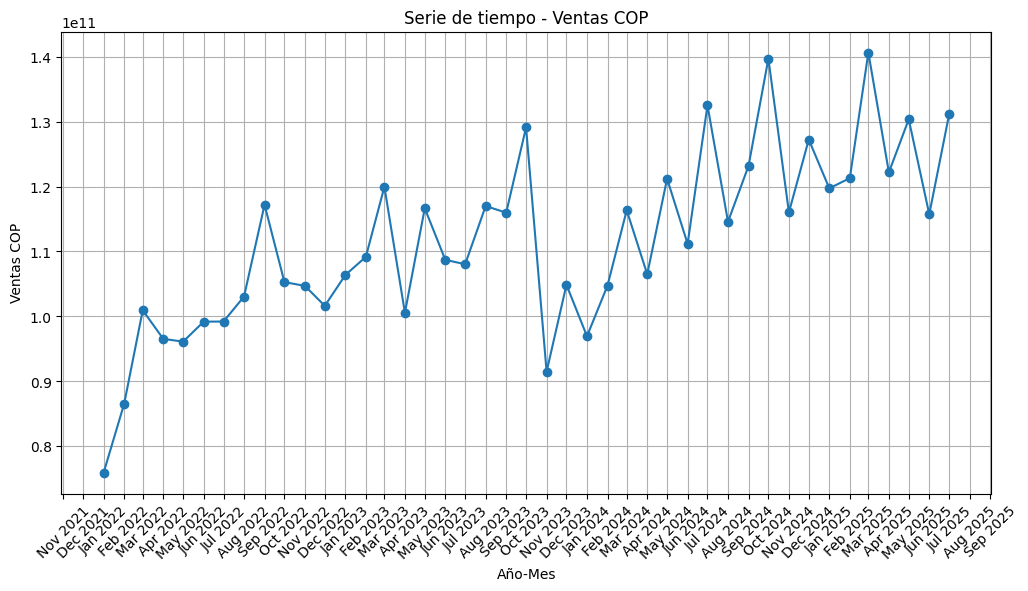

In [20]:
#Grafico de serie de tiempo general
df_general = df_general.sort_values("año_mes")

# Graficar la serie de tiempo
# Ordenar por fecha
df_general = df_general.sort_values("año_mes")

# Graficar
plt.figure(figsize=(12,6))
plt.plot(df_general["año_mes"], df_general["ventas_cop_sum"], marker="o", linestyle="-")

# Formato del eje X: mostrar Año-Mes
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))  # Ej: Ene 2024, Feb 2024
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))   # Cada mes

plt.title("Serie de tiempo - Ventas COP")
plt.xlabel("Año-Mes")
plt.ylabel("Ventas COP")
plt.grid(True)

plt.xticks(rotation=45)  # Rotar etiquetas para que no se encimen
plt.show()